In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Read the Train and Test data-set 
orig_train = pd.read_csv('train.csv')
orig_test = pd.read_csv('test.csv')

In [3]:
train = orig_train.copy()
target = orig_train['SalePrice']
test = orig_test.copy()

## Data Analysis

In [4]:
# View the dimension 
print(train.shape)
print(target.shape)
print(test.shape)

(1460, 81)
(1460,)
(1459, 80)


In [5]:
# Train - View Columns
#train.columns

In [6]:
# Test - View Columns
#test.columns

In [7]:
# Train - Summary
#train.describe()

In [8]:
# Test - Summary
#test.describe()

In [9]:
# Train - Top 5 data
#train.head()

In [10]:
# Test - Top 5 data
#test.head()

In [11]:
# Train - Bottom 5 data
#train.tail()

In [12]:
# Test - Bottom 5 data
#test.tail()

In [13]:
# Train - Info
#train.info()

In [14]:
# Test - Info
#test.info()

## Data Visualization

In [15]:
# Correlation Plot
#sns.set(style="white")

#corr = train.corr()

#plt.figure(figsize=(13, 10))
#sns.heatmap(corr, vmax=0.8)

In [16]:
# High collonearity pair: 'YearBuilt and 'GarageYrBlt', 'GrLivArea' and 'TotRmsAbvGrd', '1stFlrSF and 'TotalBsmtSF'

# Drop columns with high multi-collinearity
train.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis=1, inplace=True)
test.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis=1, inplace=True)

In [17]:
# Top 5 and Bottom 5 correlated attributes
corr = train.corr()
print(corr['SalePrice'].sort_values(ascending=False).head(10), '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Name: SalePrice, dtype: float64 



In [18]:
#plt.figure(figsize=(10, 7))
#sns.boxplot(x='OverallQual', y='SalePrice', data=train)

In [19]:
#plt.scatter(x='GrLivArea', y='SalePrice', data=train, color='r')

In [20]:
#plt.scatter(x='LotFrontage', y='SalePrice', data=train, color='r')

In [21]:
print(train['GrLivArea'].sort_values(ascending=False).head(4))
print(train['LotFrontage'].sort_values(ascending=False).head(2))

#print(train.shape)
#train.drop(train.index[[1298, 523, 1182, 691, 934]], inplace=True)
#print(train.shape)

1298    5642
523     4676
1182    4476
691     4316
Name: GrLivArea, dtype: int64
1298    313.0
934     313.0
Name: LotFrontage, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


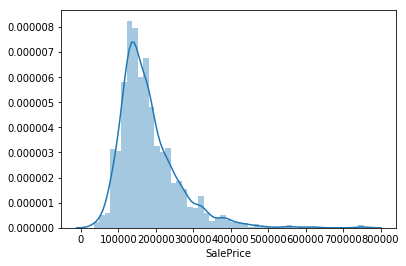

In [22]:
# Target distribution
sns.distplot(orig_train['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


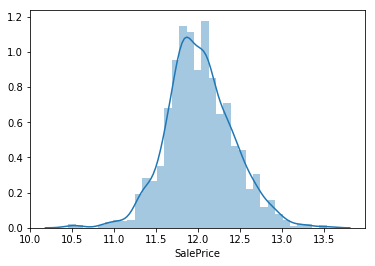

In [23]:
# Log-transformation of Target
target1 = np.log(orig_train['SalePrice'])
#target1.skew()
sns.distplot(target1)

In [24]:
# Histogram for all columns
#train.hist(bins=60, figsize=(25, 25))
#plt.show()

## Data Pre-processing

In [25]:
# Train - Summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [26]:
# Train - drop unnecessay columns with all unique values
print(train.iloc[:,:].nunique().sort_values(ascending=False))

print('Dimension Before: ', train.shape)

train.drop(['Id'], axis=1, inplace=True)
train.drop(['SalePrice'], axis=1, inplace=True)

print('Dimension After : ', train.shape)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
                 ... 
GarageQual          5
Electrical          5
ExterCond           5
GarageCond          5
MSZoning            5
HeatingQC           5
KitchenQual         4
LandContour         4
LotShape            4
Fence               4
Fireplaces          4
KitchenAbvGr        4
MasVnrType          4
BsmtExposure        4
BsmtCond  

In [27]:
# Test - drop unnecessay columns with all unique values
print(test.iloc[:,:].nunique().sort_values(ascending=False))

print('Dimension Before: ', test.shape)

test.drop(['Id'], axis=1, inplace=True)

print('Dimension After : ', test.shape)

Id               1459
LotArea          1106
GrLivArea         879
BsmtUnfSF         793
1stFlrSF          789
BsmtFinSF1        669
GarageArea        459
2ndFlrSF          407
MasVnrArea        303
WoodDeckSF        263
OpenPorchSF       203
BsmtFinSF2        161
EnclosedPorch     131
LotFrontage       115
YearBuilt         106
ScreenPorch        75
YearRemodAdd       61
MiscVal            26
Neighborhood       25
MSSubClass         16
LowQualFinSF       15
Exterior2nd        15
Exterior1st        13
3SsnPorch          13
MoSold             12
OverallQual        10
SaleType            9
OverallCond         9
Condition1          9
BedroomAbvGr        7
                 ... 
FullBath            5
MSZoning            5
YrSold              5
LotConfig           5
LandContour         4
LotShape            4
Fence               4
GarageQual          4
Heating             4
RoofMatl            4
BsmtCond            4
Electrical          4
BsmtFullBath        4
BsmtExposure        4
BsmtQual  

In [28]:
# Replace NA with None values in Train and Test dataset
replaceNAWithNone = ['Alley' ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                       'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

train[replaceNAWithNone] = pd.DataFrame(train[replaceNAWithNone].apply(lambda x : x.fillna('None')))

test[replaceNAWithNone] = pd.DataFrame(test[replaceNAWithNone].apply(lambda x : x.fillna('None')))

In [29]:
# Train - Check null values
#train_na = train.isna().sum()*100/train.isna().count()
#print(train_na.sort_values(ascending=False))

#print('Dimension Before: ', train.shape)

# Drop columns with more NA values
#train.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

#print('Dimension After : ', train.shape)

In [30]:
# Test - Check null values
#test_na = test.isna().sum()*100/test.isna().count()
#print(test_na.sort_values(ascending=False))

#print('Dimension Before: ', test.shape)

# Drop columns with more NA values
#test.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

#print('Dimension After : ', test.shape)

In [31]:
# Convert Integer into Categorical attribute
numToCatAttributes = ['MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                       'Fireplaces', 'GarageCars', 'MoSold', 'OverallCond', 'OverallQual']

In [32]:
# Train
train[numToCatAttributes] = train[numToCatAttributes].astype('category')
train[numToCatAttributes].dtypes

MSSubClass      category
BsmtFullBath    category
BsmtHalfBath    category
FullBath        category
HalfBath        category
BedroomAbvGr    category
KitchenAbvGr    category
Fireplaces      category
GarageCars      category
MoSold          category
OverallCond     category
OverallQual     category
dtype: object

In [33]:
# Test
test[numToCatAttributes] = test[numToCatAttributes].astype('category')
test[numToCatAttributes].dtypes

MSSubClass      category
BsmtFullBath    category
BsmtHalfBath    category
FullBath        category
HalfBath        category
BedroomAbvGr    category
KitchenAbvGr    category
Fireplaces      category
GarageCars      category
MoSold          category
OverallCond     category
OverallQual     category
dtype: object

In [34]:
### Train - To calculate Age from YearBuilt and YearRemodAdd 
from datetime import date
current_year = date.today().year

# YearBuilt alternative
train['Const_Age'] = current_year - train.YearBuilt
print(train['Const_Age'].head())

print('------------------------- \n')

# YearRemodAdd alternative
train['Remod_Age'] = current_year - train.YearRemodAdd
print(train['Remod_Age'].head())

print('------------------------- \n')

# YearRemodAdd alternative
train['Sold_Age'] = current_year - train.YrSold
print(train['Sold_Age'].head())

train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1, inplace=True)
print(train[['Const_Age', 'Remod_Age', 'Sold_Age']].dtypes)

0     15
1     42
2     17
3    103
4     18
Name: Const_Age, dtype: int64
------------------------- 

0    15
1    42
2    16
3    48
4    18
Name: Remod_Age, dtype: int64
------------------------- 

0    10
1    11
2    10
3    12
4    10
Name: Sold_Age, dtype: int64
Const_Age    int64
Remod_Age    int64
Sold_Age     int64
dtype: object


In [35]:
### Test - To calculate Age from YearBuilt and YearRemodAdd 
from datetime import date
current_year = date.today().year

# YearBuilt alternative
test['Const_Age'] = current_year - test.YearBuilt
print(test['Const_Age'].head())

print('------------------------- \n')

# YearRemodAdd alternative
test['Remod_Age'] = current_year - test.YearRemodAdd
print(test['Remod_Age'].head())

print('------------------------- \n')

# YearRemodAdd alternative
test['Sold_Age'] = current_year - test.YrSold
print(test['Sold_Age'].head())

test.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1, inplace=True)
print(test[['Const_Age', 'Remod_Age', 'Sold_Age']].dtypes)

0    57
1    60
2    21
3    20
4    26
Name: Const_Age, dtype: int64
------------------------- 

0    57
1    60
2    20
3    20
4    26
Name: Remod_Age, dtype: int64
------------------------- 

0    8
1    8
2    8
3    8
4    8
Name: Sold_Age, dtype: int64
Const_Age    int64
Remod_Age    int64
Sold_Age     int64
dtype: object


In [36]:
# Identifying features where a class is over 97% represented
#low_var_cat = [col for col in train.select_dtypes(exclude=['number']) if 1 - sum(train[col] == train[col].mode())/len(train) < 0.03]
#low_var_cat

In [125]:
# Train - Seperate Categorical and Numeric data
cat_label = train.dtypes[(train.dtypes == 'category') | (train.dtypes == 'object')].index
print('Categorical Attributes: \n', cat_label)

num_label = train.columns.difference(cat_label)
print('Numerical Attributes: \n', num_label)

Categorical Attributes: 
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Attributes: 
 Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Const_Ag

In [126]:
# Train - Impute the Numerical with MEDIAN Value
print('Before: \n', train[num_label].isna().sum(axis=0))

print('------------------------------')

median_imputer = Imputer(strategy='median', axis=0)
train[num_label] = pd.DataFrame(median_imputer.fit_transform(train[num_label]), columns=train[num_label].columns)
train[num_label] = train[num_label].astype(int)

print('After : \n', train[num_label].isna().sum(axis=0))

Before: 
 1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
Const_Age        0
EnclosedPorch    0
GarageArea       0
GrLivArea        0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MasVnrArea       0
MiscVal          0
OpenPorchSF      0
PoolArea         0
Remod_Age        0
ScreenPorch      0
Sold_Age         0
WoodDeckSF       0
dtype: int64
------------------------------
After : 
 1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
Const_Age        0
EnclosedPorch    0
GarageArea       0
GrLivArea        0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MasVnrArea       0
MiscVal          0
OpenPorchSF      0
PoolArea         0
Remod_Age        0
ScreenPorch      0
Sold_Age         0
WoodDeckSF       0
dtype: int64


In [127]:
# Test - Impute the Numerical with MEDIAN Value
print('Before: \n', test[num_label].isna().sum(axis=0))

print('------------------------------')

median_imputer = Imputer(strategy='median', axis=0)
test[num_label] = pd.DataFrame(median_imputer.fit_transform(test[num_label]), columns=test[num_label].columns)
test[num_label] = test[num_label].astype(int)

print('After : \n', test[num_label].isna().sum(axis=0))

Before: 
 1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
Const_Age        0
EnclosedPorch    0
GarageArea       0
GrLivArea        0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MasVnrArea       0
MiscVal          0
OpenPorchSF      0
PoolArea         0
Remod_Age        0
ScreenPorch      0
Sold_Age         0
WoodDeckSF       0
dtype: int64
------------------------------
After : 
 1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
Const_Age        0
EnclosedPorch    0
GarageArea       0
GrLivArea        0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MasVnrArea       0
MiscVal          0
OpenPorchSF      0
PoolArea         0
Remod_Age        0
ScreenPorch      0
Sold_Age         0
WoodDeckSF       0
dtype: int64


In [128]:
# Train - Impute the Categorical with MODE value
print('Before: \n', train[cat_label].isna().sum(axis=0))

print('----------------------')

train[cat_label] = pd.DataFrame(train[cat_label].apply(lambda x: x.fillna(x.mode()[0]), axis=0))

print('After: \n', train[cat_label].isna().sum(axis=0))

Before: 
 MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
Mo

In [129]:
# Test - Impute the Categorical with Mode
print('Before: \n', test[cat_label].isna().sum(axis=0))

print('----------------------')

test[cat_label] = pd.DataFrame(test[cat_label].apply(lambda x: x.fillna(x.mode()[0]), axis=0))

print('After: \n', test[cat_label].isna().sum(axis=0))

Before: 
 MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
Mo

In [130]:
# Train - Correct formatting of some attributes
test[['GarageCars']] = test[['GarageCars']].astype(int)
test[['GarageCars']] = test[['GarageCars']].astype('category')
print(test[['GarageCars']].head())

test[['BsmtFullBath']] = test[['BsmtFullBath']].astype(int)
test[['BsmtFullBath']] = test[['BsmtFullBath']].astype('category')
print(test[['BsmtFullBath']].head())

test[['BsmtHalfBath']] = test[['BsmtHalfBath']].astype(int)
test[['BsmtHalfBath']] = test[['BsmtHalfBath']].astype('category')
print(test[['BsmtHalfBath']].head())

  GarageCars
0          1
1          1
2          2
3          2
4          2
  BsmtFullBath
0            0
1            0
2            0
3            0
4            0
  BsmtHalfBath
0            0
1            0
2            0
3            0
4            0


In [131]:
# Train - Dummyfication of Categorical attributes
final_train = pd.get_dummies(train, drop_first=True)
print(final_train.shape)

(1460, 313)


In [132]:
# Test - Dummyfication of Categorical attributes
final_test = pd.get_dummies(test, drop_first=True)
print(final_test.shape)

(1459, 297)


In [133]:
# Train - Dummyfication of Categorical attributes
#print(cat_train.shape)

#cat_train_dummy = pd.get_dummies(cat_train, drop_first=True)

#print(cat_train_dummy.shape)

In [134]:
# Test - Dummyfication of Categorical attributes
#print(cat_test.shape)

#cat_test_dummy = pd.get_dummies(cat_test, drop_first=True)

#print(cat_test_dummy.shape)

In [135]:
# Train - Concatenate Numeric and Dummyfied Categorical attributes
#print(num_train.shape)
#print(cat_train_dummy.shape)

#final_train = pd.concat([num_train, cat_train_dummy], axis=1)
#final_train.shape

In [136]:
#print(num_test.shape)
#print(cat_test_dummy.shape)

# Train - Concatenate Numeric and Dummyfied Categorical attributes
#final_test = pd.concat([num_test, cat_test_dummy], axis=1)
#final_test.shape

In [137]:
final_train.columns.difference(final_test.columns)

Index(['BedroomAbvGr_8', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_Other', 'GarageQual_Fa',
       'Heating_GasA', 'Heating_OthW', 'HouseStyle_2.5Fin', 'KitchenAbvGr_3',
       'MiscFeature_TenC', 'PoolQC_Fa', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'Utilities_NoSeWa'],
      dtype='object')

In [138]:
final_test.columns.difference(final_train.columns)

Index(['Fireplaces_4', 'FullBath_4', 'GarageCars_5', 'MSSubClass_150'], dtype='object')

In [139]:
# Compare Train and Test columns and fill 0 in extra columns
for column in final_train.columns:
    if column not in final_test.columns:
        final_test[column] = 0

In [140]:
# Compare Train and Test columns and fill 0 in extra columns
for column in final_test.columns:
    if column not in final_train.columns:
        final_train[column] = 0

In [141]:
print(final_train.shape)
print(final_test.shape)

(1460, 317)
(1459, 317)


In [142]:
# Split the dataset into Train-Validation in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(final_train, target1, test_size= 0.3, random_state = 4)

In [143]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1022, 317)
(1022,)
(438, 317)
(438,)


## Linear Regression Model

In [144]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [145]:
# Prediction on Train data
y_pred = model.predict(X_val)
y_pred[0:5].tolist()

[12.288228739016498,
 12.26816360990756,
 11.919713906356776,
 11.75003941304303,
 11.64133777617106]

In [146]:
y_val.head(5)

280     12.339291
1365    12.283034
132     11.923378
357     11.805595
438     11.411446
Name: SalePrice, dtype: float64

In [147]:
#print('Intercept: \n', model.intercept_) # Get the intercept, c
#print('Coefficients: \n', model.coef_) # Get the coefficients, beta

In [148]:
# R-Square values
#print('Train R-squared:  ', model.score(X_train, y_train))
#print('Test R-squared : ', model.score(X_val, y_val))

#### OR

# R-Square values
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model.predict(X_train))
print('Train R-squared:  ', train_r2)

val_r2 = r2_score(y_val, model.predict(X_val))
print('Test R-squared:  ', val_r2) 

Train R-squared:   0.9565775560979118
Test R-squared:   0.5693719123943023


In [149]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = sqrt(train_mse)
print('Train RMSE:  ', train_rmse)
      
val_mse = mean_squared_error(y_val, model.predict(X_val))
val_rmse = sqrt(val_mse)
print('Test  RMSE:  ', val_rmse)

Train RMSE:   0.08469023448269682
Test  RMSE:   0.25074439137093313


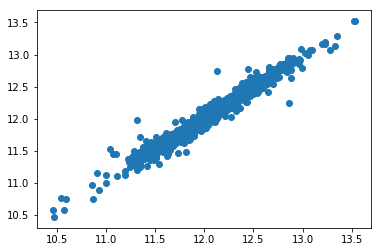

In [150]:
plt.scatter(y_train, model.predict(X_train))
plt.show()

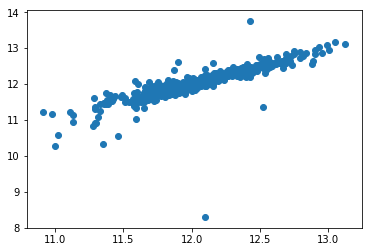

In [151]:
plt.scatter(y_val, y_pred)
plt.show()

In [153]:
# Test - Prediction
y_test = model.predict(final_test)

y_test = np.exp(y_test)
y_test = y_test.astype(int)
print(y_test[0:5].tolist())

[20749, 59287, 201066, 133372, 5703140]


In [154]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test})
submission.to_csv('y_preds_linear.csv', index=False)

## Linear Regression using Cross-Validation

In [155]:
from sklearn.cross_validation import cross_val_score

model_cv = LinearRegression(n_jobs=-1)
cv_scores = cross_val_score(model_cv, final_train, target1, cv=10, n_jobs=-1, scoring='mean_squared_error')

In [156]:
print('CV Scores at each fold: \n', cv_scores)
print('\nMean CV Scores: \n', np.mean(cv_scores))

CV Scores at each fold: 
 [-0.07455973 -0.07949793 -0.01692701 -0.03619843 -0.02544096 -0.03363077
 -0.01621324 -0.01038518 -0.07483035 -0.01725184]

Mean CV Scores: 
 -0.03849354386806504


## PCA

In [157]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train_std = pd.DataFrame(sc.fit_transform(X_train))
X_val_std = pd.DataFrame(sc.transform(X_val))

In [181]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150) 
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)

In [182]:
print(X_train_std.shape)
print(X_train_pca.shape)

(1022, 317)
(1022, 150)


In [183]:
model_pca = LinearRegression()

model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_val_pca)
y_pred_pca[0:5].tolist()

[12.310709916352787,
 12.24759520064572,
 11.890018034281944,
 11.82190701695131,
 11.708806501052793]

In [184]:
y_val.head(5)

280     12.339291
1365    12.283034
132     11.923378
357     11.805595
438     11.411446
Name: SalePrice, dtype: float64

[0.05901922 0.08667337 0.11299767 0.13406988 0.15377031 0.17183123
 0.18650637 0.20072097 0.21367256 0.2264789  0.23795944 0.24898637
 0.25983624 0.27025362 0.28040975 0.28998361 0.29944065 0.30866254
 0.31771843 0.32672423 0.33542139 0.34393334 0.35242535 0.36086837
 0.36897567 0.37696577 0.38475336 0.39246483 0.39997534 0.40746613
 0.41474451 0.42197887 0.42910052 0.43607958 0.44293563 0.44966905
 0.4563085  0.46277576 0.46918958 0.47554781 0.48182269 0.48798358
 0.49409464 0.50014933 0.50609518 0.51197157 0.51776792 0.52352887
 0.52913913 0.53470393 0.54020306 0.54565951 0.55104564 0.55631429
 0.56152221 0.56671821 0.57186513 0.57697    0.58198037 0.58696196
 0.59189724 0.59679279 0.60162377 0.60641591 0.61117702 0.61589695
 0.62058615 0.62522614 0.62980206 0.63435309 0.63882036 0.64321938
 0.64758437 0.65191318 0.6562285  0.66050134 0.66475852 0.66898327
 0.67314259 0.67725454 0.68133908 0.68539791 0.68940883 0.69339324
 0.69733702 0.7012386  0.70512574 0.7089739  0.71277947 0.7165

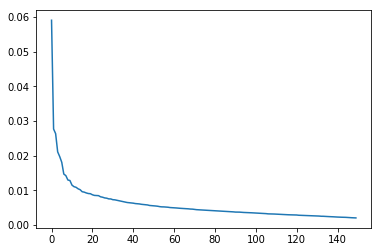

In [185]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_)

In [186]:
# R-Square values
from sklearn.metrics import r2_score

train_r2_pca = r2_score(y_train, model_pca.predict(X_train_pca))
print('Train R-squared:  ', train_r2_pca)

val_r2_pca = r2_score(y_val, model_pca.predict(X_val_pca))
print('Test  R-squared:  ', val_r2_pca) 

Train R-squared:   0.9079913292976632
Test  R-squared:   0.8582154083183073


In [187]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

train_mse_pca = mean_squared_error(y_train, model_pca.predict(X_train_pca))
train_rmse_pca = sqrt(train_mse_pca)
print('Train RMSE:  ', train_rmse_pca)
      
val_mse_pca = mean_squared_error(y_val, model_pca.predict(X_val_pca))
val_rmse_pca = sqrt(val_mse_pca)
print('Test  RMSE:  ', val_rmse_pca)

Train RMSE:   0.12327941988311139
Test  RMSE:   0.14387805869538806


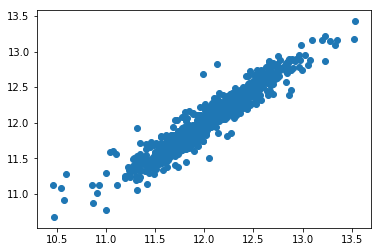

In [188]:
plt.scatter(y_train, model_pca.predict(X_train_pca))
plt.show()

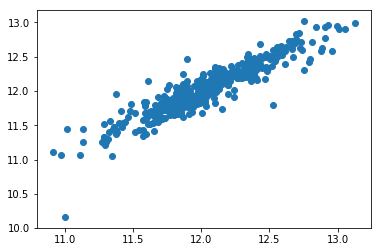

In [190]:
plt.scatter(y_val, model_pca.predict(X_val_pca))
plt.show()

In [191]:
# Test - Prediction
X_test_std = pd.DataFrame(sc.transform(final_test))
X_test_pca = pca.transform(X_test_std)
y_test_pca = model_pca.predict(X_test_pca)

y_test_pca = np.exp(y_test_pca)-1
y_test_pca = y_test_pca.astype(int)
print(y_test_pca[0:5].tolist())

[75917, 72319, 109076, 59109, 161915]


In [192]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test_pca})
submission.to_csv('y_preds_pca.csv', index=False)

## Ridge Regression

In [194]:
from sklearn.linear_model import Ridge
from math import sqrt

for i in np.arange(0.1, 1, 0.1):
    alpha = i
    print(alpha)
    rm = Ridge(alpha=alpha, normalize=True, max_iter=5000, copy_X=True)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_val)
    
    #plt.scatter(preds_ridge, y_val, color='b')
    print('Validation R-square: ', ridge_model.score(X_val, y_val))
    print('Validation RMSE:', sqrt(mean_squared_error(y_val, preds_ridge)))
    plt.show()

0.1
Validation R-square:  0.8720992381143795
Validation RMSE: 0.13665219647925142
0.2
Validation R-square:  0.8777706316397643
Validation RMSE: 0.1335881189789596
0.30000000000000004
Validation R-square:  0.8808926368355477
Validation RMSE: 0.13187101716648
0.4
Validation R-square:  0.8825651175696559
Validation RMSE: 0.1309418913379729
0.5
Validation R-square:  0.8833123321170453
Validation RMSE: 0.13052464810535172
0.6
Validation R-square:  0.8834280919410393
Validation RMSE: 0.13045988865061514
0.7000000000000001
Validation R-square:  0.8830920643300939
Validation RMSE: 0.13064778374122898
0.8
Validation R-square:  0.882421156992755
Validation RMSE: 0.1310221260019932
0.9
Validation R-square:  0.8814951308326291
Validation RMSE: 0.13153706541225513


In [196]:
rm = Ridge(alpha=0.56, normalize=True)
ridge_model = rm.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_val)

In [199]:
# Test - Prediction
y_test_ridge = ridge_model.predict(final_test)

y_test_ridge = np.exp(y_test_ridge)-1
y_test_ridge = y_test_ridge.astype(int)
print(y_test_ridge[0:5].tolist())

[60297, 61588, 112970, 69095, 151050]


In [200]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test_ridge})
submission.to_csv('y_preds_ridge.csv', index=False)

## Lasso Regression

In [201]:
from sklearn.linear_model import Lasso

for i in np.arange(0.00003, 0.00006, 0.00001):
    alpha = i
    print(alpha)
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=2000)
    lasso_model = lasso.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_val)
    
    #plt.scatter(preds_lasso, y_val, color='b')
    print('Validation R-square: ', lasso_model.score(X_val, y_val))
    print('Validation RMSE:', sqrt(mean_squared_error(y_val, preds_lasso)))
    plt.show()

3e-05
Validation R-square:  0.870227173299849
Validation RMSE: 0.13764864265909266
4e-05
Validation R-square:  0.8771007864748697
Validation RMSE: 0.13395366571378176
5.000000000000001e-05
Validation R-square:  0.8756299715087446
Validation RMSE: 0.13475283717284456


In [202]:
lasso = Lasso(alpha=0.00004, normalize=True)
lasso_model = lasso.fit(X_train, y_train)
preds_lasso = lasso_model.predict(X_val)

In [204]:
# Test - Prediction
y_test_lasso = lasso_model.predict(final_test)

y_test_lasso = np.exp(y_test_lasso)
y_test_lasso = y_test_lasso.astype(int)
print(y_test_lasso[0:5].tolist())

[28415, 26160, 74470, 36778, 123109]


In [205]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test_lasso})
submission.to_csv('y_preds_lasso.csv', index=False)

## Gradient Boosting Regressor

In [206]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [207]:
y_pred = model_gbm.predict(X_val)
y_pred[0:5].tolist()

[12.378748097251272,
 12.278280685489324,
 11.892901517980915,
 11.920513563671681,
 11.381202769276602]

In [208]:
y_val[0:5]

280     12.339291
1365    12.283034
132     11.923378
357     11.805595
438     11.411446
Name: SalePrice, dtype: float64

In [209]:
print('Train R-squared: ', model_gbm.score(X_train, y_train))
print('Test  R-squared: ', model_gbm.score(X_val, y_val))

Train R-squared:  0.9593265713070662
Test  R-squared:  0.8933470057984151


In [210]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

train_mse = mean_squared_error(y_train, model_gbm.predict(X_train))
train_rmse = sqrt(train_mse)
print('Train RMSE:  ', train_rmse)
      
test_mse = mean_squared_error(y_val, model_gbm.predict(X_val))
test_rmse = sqrt(test_mse)
print('Test  RMSE:  ', test_rmse)

Train RMSE:   0.08196559503027986
Test  RMSE:   0.12478620501080498


In [212]:
# Test - Prediction
y_test_gbm = model_gbm.predict(final_test)

y_test_gbm = np.exp(y_test_gbm)
y_test_gbm = y_test_gbm.astype(int)
print(y_test_gbm[0:5].tolist())

[114008, 144323, 170068, 181350, 158342]


In [213]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test_gbm})
submission.to_csv('y_preds_gbm.csv', index=False)

## Gradient Boosting Regressor using Random CV

In [214]:
from sklearn.model_selection import RandomizedSearchCV

gbm = GradientBoostingRegressor()

param_grid = {'learning_rate': [0.1, 0.2, 0.01],
              'max_depth': np.arange(20, 70, 1),
              'max_features': np.arange(20, 70, 1),
              'max_leaf_nodes': np.arange(5, 15, 1),
              'n_estimators': np.arange(100, 300, 5),
             }

rsearch = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=100, n_jobs=-1)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'learning_rate': [0.1, 0.2, 0.01], 'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]), 'max_fea...215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295])},


In [215]:
rsearch.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=53, max_features=41,
             max_leaf_nodes=11, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=245, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [217]:
print('Train R-square: ', rsearch.score(X_train, y_train))
print('Val   R-square: ', rsearch.score(X_val, y_val))

Train R-square:  0.9914134247125568
Val   R-square:  0.8940133996624283


In [218]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

train_mse = mean_squared_error(y_train, rsearch.predict(X_train))
train_rmse = sqrt(train_mse)
print('Train RMSE:  ', train_rmse)
      
test_mse = mean_squared_error(y_val, rsearch.predict(X_val))
test_rmse = sqrt(test_mse)
print('Test  RMSE:  ', test_rmse)

Train RMSE:   0.037660509831752474
Test  RMSE:   0.12439574684655345


In [219]:
# Test - Prediction
y_test_gbm_cv = rsearch.predict(final_test)

y_test_gbm_cv = np.exp(y_test_gbm_cv)
y_test_gbm_cv = y_test_gbm_cv.astype(int)
print(y_test_gbm_cv[0:5].tolist())

[140173, 153821, 144035, 146051, 131950]


In [220]:
######################## Final Submission ########################
#Submit the prediction
submission = pd.DataFrame({"Id": orig_test['Id'], "SalePrice": y_test_gbm_cv})
submission.to_csv('y_preds_gbm_cv.csv', index=False)